In this notebook we apply HOTSPOT to identify SVFs across datasets

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import hotspot
import os

In [3]:
maindir='../../data/unprocessed_adata/'
output_dir='../../data/unprocessed_adata_nuclei/'
files=os.listdir(maindir)
files=['ms_brain_multisection1.h5ad',
       'human_brain.h5ad',
 'ms_brain_multisection2.h5ad',
 'ms_brain_multisection3.h5ad',
'realmouse_1.h5ad',
 'realmouse_2.h5ad',
 'realmouse_3.h5ad',
 'realmouse_4.h5ad',
    'hbreast_idc_addon_set1.h5ad',
 'hbreast_idc_addon_set2.h5ad',
 'hbreast_idc_addon_set4.h5ad',
 'hbreast_idc_entiresample_set3.h5ad',
 'hbreast_ilc_addon_set2.h5ad',
 'hbreast_ilc_addon_set4.h5ad',
 'hbreast_ilc_entiresample_set3.h5ad',
 'healthy_lung.h5ad',
 'human_alzheimers.h5ad',
 'human_gbm.h5ad',
 'human_spinal_chord_active.h5ad',
 'human_spinal_chord_inactive.h5ad',
 'h_breast_1.h5ad',
 'h_breast_2.h5ad',
 'lung_cancer.h5ad',
 'ms_brain_fullcoronal.h5ad',
 'ms_brain_partialcoronal.h5ad',
 ]

# Run HOTSPOT ON ALL samples

In [25]:
for f in files[:]:
    try:
        print(f)
        if not os.path.exists('../../figures/SVF/'+str(f.split('.')[0])+'__hotspot.csv'):
            adata1=sc.read(output_dir+f)
            adata1.obsm["spatial"]=np.array([adata1.obs.x_centroid,adata1.obs.y_centroid]).transpose().astype('float64')
            adata1.obsm['spatial']=np.array(adata1.obs.loc[:,['x_centroid','y_centroid']])
            adata1=sc.AnnData(adata1.X,obs=adata1.obs,var=adata1.var,obsm=adata1.obsm)
            adata1.obs['total_counts']=adata1.obs['total_counts'].astype(float)
            adata1=adata1[adata1.obs['total_counts']!=0]
            adata1.layers['raw']=adata1.X
            hs = hotspot.Hotspot(
                adata1,
                layer_key='raw',
                model='bernoulli',
                latent_obsm_key="spatial",
                umi_counts_obs_key="total_counts")
            hs.create_knn_graph(
                weighted_graph=False, n_neighbors=10,
            )
            hs_results = hs.compute_autocorrelations(jobs=1)
            # We use the Z score to rank genes. C order is pretty much the same
            hs_results['rank']=list(hs_results['Z'].rank())
            hs_results=hs_results.loc[:,['Pval','FDR','rank']]
            hs_results.to_csv('../../figures/SVF/'+str(f.split('.')[0])+'__hotspot.csv')
            print('done')
        else:
            print('exists')
    except:
        print('not possible')

ms_brain_multisection1.h5ad
exists
human_brain.h5ad
exists
ms_brain_multisection2.h5ad
exists
ms_brain_multisection3.h5ad
exists
realmouse_1.h5ad
exists
realmouse_2.h5ad
exists
realmouse_3.h5ad
exists
realmouse_4.h5ad
exists
hbreast_idc_addon_set1.h5ad
not possible
hbreast_idc_addon_set2.h5ad
not possible
hbreast_idc_addon_set4.h5ad
not possible
hbreast_idc_entiresample_set3.h5ad
not possible
hbreast_ilc_addon_set2.h5ad
exists
hbreast_ilc_addon_set4.h5ad
exists
hbreast_ilc_entiresample_set3.h5ad
exists
healthy_lung.h5ad
exists
human_alzheimers.h5ad
exists
human_gbm.h5ad
exists
human_spinal_chord_active.h5ad
exists
human_spinal_chord_inactive.h5ad
exists
h_breast_1.h5ad
exists
h_breast_2.h5ad
exists
lung_cancer.h5ad
exists
ms_brain_fullcoronal.h5ad
exists
ms_brain_partialcoronal.h5ad
exists


# Run HOTSPOT on 5000 cells

In [49]:
for f in files[:]:
    try:
        print(f)
        if not os.path.exists('../../figures/SVF/'+str(f.split('.')[0])+'__hotspot5000.csv'):
            adata1=sc.read(output_dir+f)
            adata1.obsm["spatial"]=np.array([adata1.obs.x_centroid,adata1.obs.y_centroid]).transpose().astype('float64')
            adata1.obsm['spatial']=np.array(adata1.obs.loc[:,['x_centroid','y_centroid']])
            adata1=sc.AnnData(adata1.X,obs=adata1.obs,var=adata1.var,obsm=adata1.obsm)
            adata1.obs['total_counts']=adata1.obs['total_counts'].astype(float)
            adata1=adata1[adata1.obs['total_counts']!=0]
            adata1.layers['raw']=adata1.X
            import random
            some=random.sample(range(0,adata1.shape[0]),5000)
            adata1=adata1[some,:]
            adata1=adata1[:,np.sum(adata1.X,axis=0)>0]
            hs = hotspot.Hotspot(
                adata1,
                layer_key='raw',
                model='bernoulli',
                latent_obsm_key="spatial",
                umi_counts_obs_key="total_counts")
            hs.create_knn_graph(
                weighted_graph=False, n_neighbors=10,
            )
            hs_results = hs.compute_autocorrelations(jobs=1)
            # We use the Z score to rank genes. C order is pretty much the same
            hs_results['rank']=list(hs_results['Z'].rank())
            hs_results=hs_results.loc[:,['Pval','FDR','rank']]
            hs_results.to_csv('../../figures/SVF/'+str(f.split('.')[0])+'__hotspot5000.csv')
            print('done')
        else:
            print('exists')
    except:
        print('not possible')

ms_brain_multisection1.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:01<00:00, 377.72it/s]


done
human_brain.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 525/525 [00:01<00:00, 374.26it/s]


done
ms_brain_multisection2.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 540/540 [00:01<00:00, 390.48it/s]


done
ms_brain_multisection3.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:01<00:00, 370.58it/s]


done
realmouse_1.h5ad
exists
realmouse_2.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:01<00:00, 366.72it/s]


done
realmouse_3.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:01<00:00, 380.65it/s]


done
realmouse_4.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:01<00:00, 363.44it/s]


done
hbreast_idc_addon_set1.h5ad
not possible
hbreast_idc_addon_set2.h5ad
not possible
hbreast_idc_addon_set4.h5ad
not possible
hbreast_idc_entiresample_set3.h5ad
not possible
hbreast_ilc_addon_set2.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 529/529 [00:01<00:00, 374.71it/s]


done
hbreast_ilc_addon_set4.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 520/520 [00:01<00:00, 382.05it/s]


done
hbreast_ilc_entiresample_set3.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 525/525 [00:01<00:00, 368.55it/s]


done
healthy_lung.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 519/519 [00:01<00:00, 422.83it/s]


done
human_alzheimers.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 489/489 [00:01<00:00, 347.65it/s]


done
human_gbm.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 540/540 [00:01<00:00, 342.90it/s]


done
human_spinal_chord_active.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 528/528 [00:01<00:00, 367.60it/s]


done
human_spinal_chord_inactive.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 536/536 [00:01<00:00, 357.13it/s]


done
h_breast_1.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 373/373 [00:01<00:00, 355.15it/s]


done
h_breast_2.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 521/521 [00:01<00:00, 324.91it/s]


done
lung_cancer.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [00:01<00:00, 360.36it/s]


done
ms_brain_fullcoronal.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 536/536 [00:01<00:00, 358.93it/s]


done
ms_brain_partialcoronal.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 537/537 [00:01<00:00, 342.50it/s]

done


# Times HOTSPOT

In [34]:
import time
f='ms_brain_multisection1.h5ad'
cells=[500,1000,5000,10000,50000,100000]
times=[]
for cel in cells:
    print(f)
    start_time = time.time()
    adata1=sc.read(output_dir+f)
    adata1.obsm["spatial"]=np.array([adata1.obs.x_centroid,adata1.obs.y_centroid]).transpose().astype('float64')
    adata1.obsm['spatial']=np.array(adata1.obs.loc[:,['x_centroid','y_centroid']])
    adata1=sc.AnnData(adata1.X,obs=adata1.obs,var=adata1.var,obsm=adata1.obsm)
    adata1.obs['total_counts']=adata1.obs['total_counts'].astype(float)
    adata1=adata1[adata1.obs['total_counts']!=0]
    import random
    some=random.sample(range(0,adata1.shape[0]),int(cel))
    adata1=adata1[some,:]
    adata1=adata1[:,np.sum(adata1.X,axis=0)>0]
    adata1.layers['raw']=adata1.X
    hs = hotspot.Hotspot(
        adata1,
        layer_key='raw',
        model='bernoulli',
        latent_obsm_key="spatial",
        umi_counts_obs_key="total_counts")
    hs.create_knn_graph(
        weighted_graph=False, n_neighbors=10,
    )
    hs_results = hs.compute_autocorrelations(jobs=1)
    # We use the Z score to rank genes. C order is pretty much the same
    hs_results['rank']=list(hs_results['Z'].rank())
    hs_results=hs_results.loc[:,['Pval','FDR','rank']]
    end_time = time.time()
    times.append(end_time-start_time)

ms_brain_multisection1.h5ad


100%|███████████████████████████████████████████████████████████████████████████████| 449/449 [00:00<00:00, 1079.52it/s]


ms_brain_multisection1.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 521/521 [00:00<00:00, 830.22it/s]


ms_brain_multisection1.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:01<00:00, 331.27it/s]


ms_brain_multisection1.h5ad


100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:02<00:00, 193.39it/s]


ms_brain_multisection1.h5ad


100%|█████████████████████████████████████████████████████████████████████████████████| 541/541 [00:12<00:00, 44.38it/s]


ms_brain_multisection1.h5ad


100%|█████████████████████████████████████████████████████████████████████████████████| 541/541 [00:28<00:00, 19.26it/s]


In [35]:
timesres=pd.DataFrame([cells,times],index=['cells','times_HOTSPOT']).transpose()

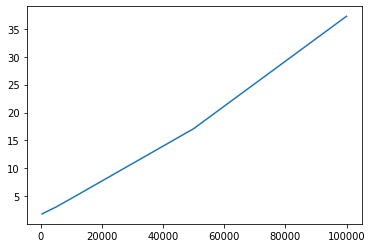

In [44]:
plt.plot(list(timesres['cells'].astype(int)),list(timesres['times_HOTSPOT'].astype(float)))

In [45]:
timesres.to_csv('../../figures/times_svf/hotspot_times.csv')